In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import torch

In [2]:
REBUILD_DATA = False # set to true to one once, then back to false unless you want to change something in your training data.

class Crack():
    IMG_SIZE = 100
    
    Good="D://personal//family//Machine Learning Projects Final//Datasets//Concreate Crack//Negative"
    Crack="D://personal//family//Machine Learning Projects Final//Datasets//Concreate Crack//Positive"

    
    LABELS = {Good: 0, Crack: 1}
    
    training_data = []

    crackcount = 0
    goodcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):  #tqdm is progress bar
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        
                        ret,img=cv2.threshold(img,100,255,cv2.THRESH_BINARY)
                        
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]]) 

                        if label == self.Good:
                            self.goodcount += 1
                        elif label == self.Crack:
                            self.crackcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("crack_training_data.npy", self.training_data)
        print('Good:',Crack.goodcount)
        print('Crack:',Crack.crackcount)

if REBUILD_DATA:
    crack = Crack()
    crack.make_training_data()

In [3]:
training_data=np.load('crack_training_data.npy',allow_pickle=True)

In [5]:
len(training_data)

40000

In [13]:
a=0
for i in training_data:
    print(i[0])
    print(i[1])
    x=i[0]
    a+=1
    if a==5:
        break

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[1. 0.]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[1. 0.]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[1. 0.]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[1. 0.]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[0. 1.]


In [14]:
x.shape

(100, 100)

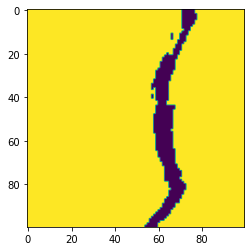

In [15]:
plt.imshow(x)
plt.show()

In [16]:
image=cv2.imread('00001.jpg',0)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [17]:
len(image)

227

In [18]:
image=cv2.resize(image,(100,100))

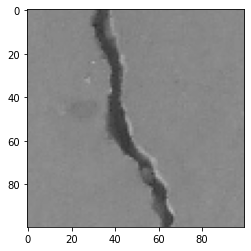

In [19]:
plt.imshow(image)
plt.show()

In [20]:
ret,binary_image=cv2.threshold(image,100,255,cv2.THRESH_BINARY)

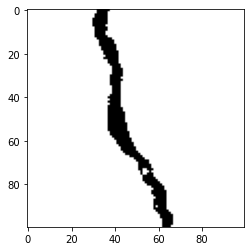

In [21]:
plt.imshow(binary_image)
plt.show()

In [22]:
crack=cv2.Canny(binary_image,100,100)



# MODEL

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        self.conv1 = nn.Conv2d(1, 32, 5) 
        self.conv2 = nn.Conv2d(32, 64, 5) 
        self.conv3 = nn.Conv2d(64, 128, 5)
        
        self.fc1 = nn.Linear(128*9*9, 512) #flattening. output= (n-f+2p)/s
        self.fc2 = nn.Linear(512, 2) 

    def forward(self, x):
        
        x=x
        
        x=self.conv1(x)
        x=F.relu(x)
        x=F.max_pool2d(x,kernel_size=2,stride=2)
        
        x=self.conv2(x)
        x=F.relu(x)
        x=F.max_pool2d(x,kernel_size=2,stride=2) 

        x=self.conv3(x)
        x=F.relu(x)
        x=F.max_pool2d(x,kernel_size=2,stride=2)
        
        x = x.view(-1, 128*9*9) 
        
        x = F.relu(self.fc1(x))
        
        x = self.fc2(x) 
        return F.softmax(x, dim=1)
        
        
#         x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
#         x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
#         x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))
#         x = x.view(-1, 128*9*9) 
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x) 
#         return F.softmax(x, dim=1)


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=10368, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [7]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

In [8]:
X = torch.Tensor([i[0] for i in training_data]).view(-1,100,100)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

In [ ]:
The view function is meant to reshape the tensor.

Say you have a tensor

import torch
a = torch.range(1, 16)
a is a tensor that has 16 elements from 1 to 16(included). If you want to reshape this tensor to make it a 4 x 4 tensor 
then you can use

a = a.view(4, 4)
Now a will be a 4 x 4 tensor. Note that after the reshape the total number of elements need to remain the same. 
Reshaping the tensor a to a 3 x 5 tensor would not be appropriate.

What is the meaning of parameter -1?
If there is any situation that you don't know how many rows you want but are sure of the number of columns, then 

you can specify this with a -1. (Note that you can extend this to tensors with more dimensions. Only one of the axis 
                                 value can be -1). This is a way of telling the library: "give me a tensor that has these 
    many columns and you compute the appropriate number of rows that is necessary to make this happen".

This can be seen in the neural network code that you have given above. After the line x = self.pool(F.relu(self.conv2(x))) 
in the forward function, you will have a 16 depth feature map. You have to flatten this to give it to the fully connected 
layer. So you tell pytorch to reshape the tensor you obtained to have specific number of columns and tell it to decide the 
number of rows by itself.

In [9]:
VAL_PCT = 0.1 
val_size = int(len(X)*VAL_PCT)
print(val_size)

4000


In [10]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]
print(len(train_X), len(test_X))


36000 4000


In [11]:
BATCH_SIZE = 100
EPOCHS = 1

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 100, 100)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch}. Loss: {loss}")

100%|████████████████████████████████████████████████████████████████████████████████| 360/360 [17:02<00:00,  2.84s/it]

Epoch: 0. Loss: 0.014223619364202023


In [12]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1, 1, 100, 100))[0] 
        predicted_class = torch.argmax(net_out)

        if predicted_class == real_class:
            correct += 1
        total += 1
print("Accuracy: ", round(correct/total, 3))

100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [02:51<00:00, 23.31it/s]

Accuracy:  0.975
